# Model Training
Model Training and Evaluation

Having preprocessed the data and saved it to a CSV file, the next step is to build and evaluate various models. This section outlines the approach for model training, evaluation, and feature importance analysis to ensure we achieve the best model for predicting insurance claims.

In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

1. Train-Test Split
Implementation Steps:

Load the Data:

Import the preprocessed dataset from the CSV file.

2. Divide the Data:

Use train_test_split from scikit-learn to split the data into training and test sets.

In [4]:
# Load the preprocessed data
df = pd.read_csv('../data/preprocessed_data.csv')

# Define features and target variable
X = df.drop(columns=['TotalPremium'])
y = df['TotalPremium']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Modeling Techniques
Implementation Steps:

Linear Regression:

In [5]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

Decision Tree

In [7]:
# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

Random Forests:

In [10]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

XGBoost

In [8]:
# Initialize and train the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

Model Evaluation

In [11]:
# Evaluation metrics
metrics = {
    'Linear Regression': {'MSE': mse_lr, 'R2': r2_lr},
    'Decision Tree': {'MSE': mse_dt, 'R2': r2_dt},
    'Random Forest': {'MSE': mse_rf, 'R2': r2_rf},
    'XGBoost': {'MSE': mse_xgb, 'R2': r2_xgb}
}


In [13]:
pd.DataFrame(metrics).T

,MSE,R2
Linear Regression,280.714756,0.417132
Decision Tree,251.763947,0.477244
Random Forest,251.731428,0.477312
XGBoost,262.501044,0.454950


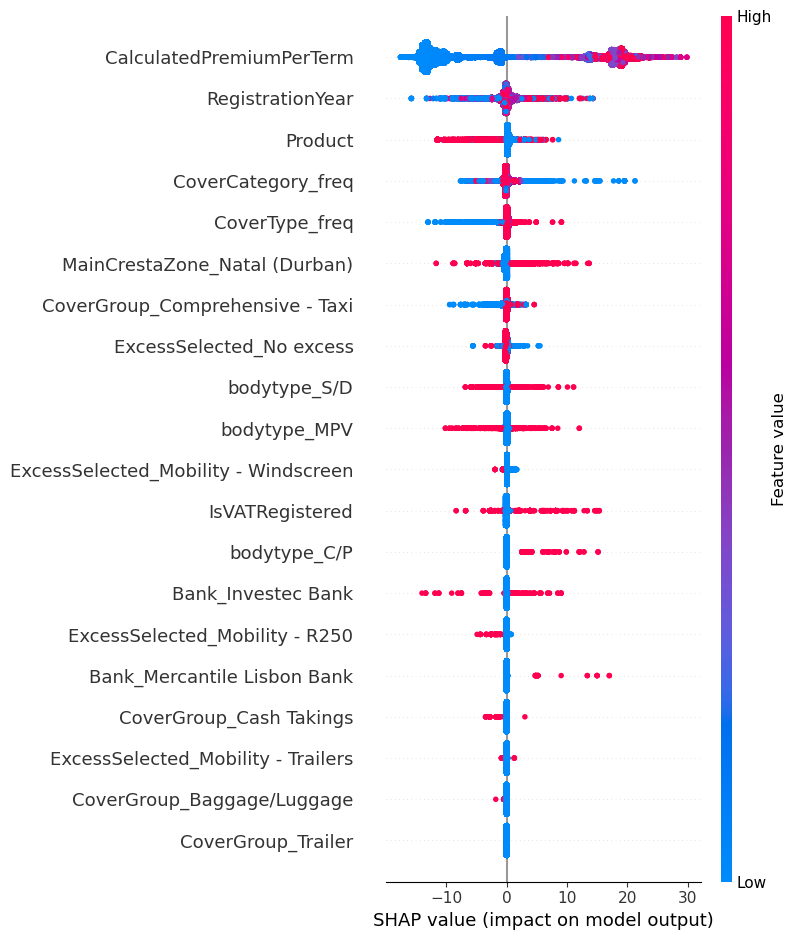

In [17]:
import shap

# Initialize SHAP explainer for XGBoost
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test)


In [18]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

# Explain predictions for a sample instance
i = 0  # index of the instance to explain
exp = lime_explainer.explain_instance(X_test.iloc[i].values, xgb_model.predict)
exp.show_in_notebook(show_table=True, show_all=False)


In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for i, (model_name, preds) in enumerate(predictions.items()):
    plt.subplot(2, 2, i + 1)
    plt.scatter(y_test, preds, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Predictions vs Actual')

plt.tight_layout()
plt.show()


NameError: name 'predictions' is not defined

<Figure size 1200x800 with 0 Axes>